# Eel mystery project: park animal incident analysis
For this project, I analyzed the NYC Urban Park Ranger Animal Condition Response dataset: https://data.cityofnewyork.us/Environment/Urban-Park-Ranger-Animal-Condition-Response/fuhs-xmg2/about_data 

The open data portal included a nice data dictioanry excel file, which I saved to the project folder: `UrbanParkRangerAnimalConditionResponse_DataDictionary_20181107.xlsx`

I saved the downloaded data as `park_animals.csv` - it was last updated on August 8, 2023. The column descriptions on the opendata website make it clear these are reported animal rescue calls logged by the city's Department of Parks and Recreation, which began publishing this data in 2018.

## My questions for this data
- Was the 2020 Prospect Park eel dump an isolated incident? How many eel dumping incidents in parks have there been? Why doesn't this one show up in the data?
- What are the other exotic animals that show up?
- What were the alligator incidents? How many? When and where?
- What animals are most common?
- Which parks?
- How many of these reports end up being false alarms? What happens to animals that are found?
- What kinds of animals are found healthy, unhealthy and DOA?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('park_animals.csv')
df.head()

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,311SR Number,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number
0,06/23/2021 04:45:00 PM,06/24/2021 08:00:00 AM,Brooklyn,Sternberg Park,Inside locked athletic field under construction,Chukar,Other,Exotic,Healthy,6.00,...,311-06712416,ACC,6.0,False,False,NaN,NaN,False,False,163537
1,06/24/2021 10:00:00 AM,06/24/2021 11:00:00 AM,Bronx,Haffen Park,Haffen Pool,Sparrow,Central,Native,Healthy,1.75,...,311-06714879,Rehabilitator,4.0,False,False,NaN,NaN,False,False,NaN
2,06/23/2021 02:30:00 PM,06/23/2021 02:30:00 PM,Bronx,Pelham Bay Park,Pelham Bay South,White-tailed Deer,Employee,Native,NaN,1.00,...,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
3,06/23/2021 01:00:00 PM,06/23/2021 01:10:00 PM,Staten Island,Willowbrook Park,The carousel,Raccoon,Employee,Native,NaN,2.00,...,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
4,06/23/2021 09:20:00 AM,06/23/2021 09:20:00 AM,Queens,Judge Moses Weinstein Playground,Garbage can,Virginia Opossum,Central,Native,Healthy,2.25,...,311-06699415,ACC,1.0,False,False,NaN,NaN,False,False,119833


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date and Time of initial call     5066 non-null   object 
 1   Date and time of Ranger response  5066 non-null   object 
 2   Borough                           5066 non-null   object 
 3   Property                          5065 non-null   object 
 4   Location                          5026 non-null   object 
 5   Species Description               5064 non-null   object 
 6   Call Source                       5066 non-null   object 
 7   Species Status                    5022 non-null   object 
 8   Animal Condition                  4499 non-null   object 
 9   Duration of Response              5066 non-null   float64
 10  Age                               5066 non-null   object 
 11  Animal Class                      5066 non-null   object 
 12  311SR 

In [4]:
# Confirmed few columns have null values, none of the ones I'm most interested in have many.
# Creating a year column
df['year'] = df['Date and Time of initial call'].str[6:10]
df.head()

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number,year
0,06/23/2021 04:45:00 PM,06/24/2021 08:00:00 AM,Brooklyn,Sternberg Park,Inside locked athletic field under construction,Chukar,Other,Exotic,Healthy,6.00,...,ACC,6.0,False,False,NaN,NaN,False,False,163537,2021
1,06/24/2021 10:00:00 AM,06/24/2021 11:00:00 AM,Bronx,Haffen Park,Haffen Pool,Sparrow,Central,Native,Healthy,1.75,...,Rehabilitator,4.0,False,False,NaN,NaN,False,False,NaN,2021
2,06/23/2021 02:30:00 PM,06/23/2021 02:30:00 PM,Bronx,Pelham Bay Park,Pelham Bay South,White-tailed Deer,Employee,Native,NaN,1.00,...,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,2021
3,06/23/2021 01:00:00 PM,06/23/2021 01:10:00 PM,Staten Island,Willowbrook Park,The carousel,Raccoon,Employee,Native,NaN,2.00,...,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,2021
4,06/23/2021 09:20:00 AM,06/23/2021 09:20:00 AM,Queens,Judge Moses Weinstein Playground,Garbage can,Virginia Opossum,Central,Native,Healthy,2.25,...,ACC,1.0,False,False,NaN,NaN,False,False,119833,2021


In [5]:
df.value_counts('year')

year
2022    1209
2021     992
2020     817
2023     717
2018     700
2019     631
Name: count, dtype: int64

In [6]:
park_years = pd.DataFrame(df.value_counts('year'))
park_years

,count
year,
2022,1209
2021,992
2020,817
2023,717
2018,700
2019,631


<Axes: xlabel='year'>

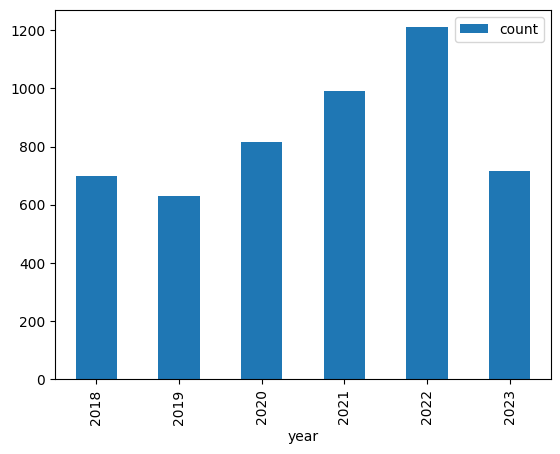

In [7]:
park_years.sort_values('year', ascending = True).plot.bar()

In [9]:
df.value_counts('Animal Condition', normalize=True)

Animal Condition
Healthy      0.348966
Injured      0.278506
Unhealthy    0.246499
DOA          0.126028
Name: proportion, dtype: float64

In [10]:
# Not very many invasive and exotic species
df.value_counts('Species Status', normalize=True)

Species Status
Native      0.766826
Domestic    0.160892
Invasive    0.056949
Exotic      0.015333
Name: proportion, dtype: float64

In [11]:
# Largest sources of calls are employees and public
df.value_counts('Call Source')

Call Source
Employee                             1549
Public                               1306
Central                              1086
Conservancies/"Friends of" Groups     571
Observed by Ranger                    357
Other                                 148
WBF                                    47
WINORR                                  2
Name: count, dtype: int64

In [12]:
# Unfounded is second most common final action
df.value_counts('Final Ranger Action')

Final Ranger Action
ACC                                             1348
Unfounded                                       1113
Relocated/Condition Corrected                   1049
Rehabilitator                                    630
Monitored Animal                                 563
Advised/Educated others                          264
Submitted for DEC Testing                         64
Released back into Park after Rehabilitation      35
Name: count, dtype: int64

In [14]:
unfounded = df[df['Final Ranger Action'] == 'Unfounded']['year'].value_counts()
unfounded

year
2022    261
2021    232
2020    178
2019    149
2023    148
2018    145
Name: count, dtype: int64

In [15]:
founded = df[df['Final Ranger Action'] != 'Unfounded']['year'].value_counts()
founded

year
2022    948
2021    760
2020    639
2023    569
2018    555
2019    482
Name: count, dtype: int64

In [16]:
# building a df with founded and unfounded per year
finalaction_yr = pd.DataFrame(park_years)
finalaction_yr

,count
year,
2022,1209
2021,992
2020,817
2023,717
2018,700
2019,631


In [17]:
finalaction_yr['founded'] = pd.DataFrame(founded)
finalaction_yr

,count,founded
year,,
2022,1209,948
2021,992,760
2020,817,639
2023,717,569
2018,700,555
2019,631,482


In [18]:
finalaction_yr['unfounded'] = pd.DataFrame(unfounded)
finalaction_yr

,count,founded,unfounded
year,,,
2022,1209,948,261
2021,992,760,232
2020,817,639,178
2023,717,569,148
2018,700,555,145
2019,631,482,149


In [21]:
finalaction_yr = finalaction_yr.drop('count', axis=1)
finalaction_yr

,founded,unfounded
year,,
2022,948,261
2021,760,232
2020,639,178
2023,569,148
2018,555,145
2019,482,149


In [22]:
# Create csv for Chart 1
finalaction_yr.to_csv('unfounded_yr.csv')

In [23]:
# Looking for eels
df.value_counts('Species Description')

Species Description
Raccoon                  1225
Canada Goose              367
Dog                       247
Eastern Gray Squirrel     235
Red-tailed Hawk           217
                         ... 
Tortoise (Unknown)          1
Turtle (unknown)            1
Sperm Whale                 1
Spiny Dogfish               1
Spiny Dogfish Shark         1
Name: count, Length: 329, dtype: int64

In [62]:
df.value_counts('Animal Class').head(10)

Animal Class
Birds                               1688
Small Mammals-RVS                   1387
Domestic                             512
Small Mammals-non RVS                431
Raptors                              340
Terrestrial Reptile or Amphibian     291
Deer                                 104
Domestic, Birds                       63
Domestic;#Birds                       56
Coyotes                               34
Name: count, dtype: int64

In [26]:
df[df['Species Status'] == 'Invasive']['Animal Class'].value_counts(normalize=True)

Animal Class
Birds                               0.594406
Terrestrial Reptile or Amphibian    0.367133
Small Mammals-non RVS               0.027972
Marine Reptiles                     0.003497
Non Native Fish-(invasive)          0.003497
Fish-numerous quantity              0.003497
Name: proportion, dtype: float64

In [27]:
df[df['Species Status'] == 'Invasive']['Final Ranger Action'].value_counts(normalize=True)

Final Ranger Action
Relocated/Condition Corrected                   0.342657
Monitored Animal                                0.167832
Rehabilitator                                   0.136364
Unfounded                                       0.125874
Advised/Educated others                         0.108392
ACC                                             0.101399
Released back into Park after Rehabilitation    0.013986
Submitted for DEC Testing                       0.003497
Name: proportion, dtype: float64

In [28]:
df[df['Species Status'] == 'Exotic']['Animal Class'].value_counts(normalize=True)

Animal Class
Terrestrial Reptile or Amphibian    0.480519
Birds                               0.428571
Raptors                             0.025974
Small Mammals-non RVS               0.025974
Rare, Endangered, Dangerous         0.012987
Small Mammals-RVS                   0.012987
Birds;#Domestic                     0.012987
Name: proportion, dtype: float64

In [29]:
df[df['Species Status'] == 'Exotic']['Final Ranger Action'].value_counts(normalize=True)

Final Ranger Action
Unfounded                        0.337662
ACC                              0.272727
Relocated/Condition Corrected    0.142857
Monitored Animal                 0.103896
Rehabilitator                    0.077922
Advised/Educated others          0.051948
Submitted for DEC Testing        0.012987
Name: proportion, dtype: float64

In [30]:
exotic_df = df[df['Species Status'] == 'Exotic']
exotic_df.head()

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number,year
0,06/23/2021 04:45:00 PM,06/24/2021 08:00:00 AM,Brooklyn,Sternberg Park,Inside locked athletic field under construction,Chukar,Other,Exotic,Healthy,6.00,...,ACC,6.0,False,False,NaN,NaN,False,False,163537,2021
24,06/18/2021 04:00:00 PM,06/18/2021 04:05:00 PM,Bronx,Crotona Park,Behind Crotona Park Nature Center,Argentine Black and White Tegu,Employee,Exotic,Unhealthy,10.00,...,ACC,1.0,False,False,NaN,NaN,False,False,119570,2021
86,06/02/2021 10:15:00 AM,06/02/2021 10:45:00 AM,Staten Island,Freshkills Park,William T. Davis Wildlife Refuge,Spiny Softshell Turtle,Employee,Exotic,Healthy,5.00,...,Rehabilitator,1.0,False,False,Wild Bird Fund,NaN,False,False,NaN,2021
113,05/26/2021 09:20:00 AM,05/26/2021 09:22:00 AM,Bronx,Van Cortlandt Park,Meadow behind VC House,Bearded Dragon,Employee,Exotic,Healthy,1.00,...,ACC,1.0,False,False,NaN,NaN,False,False,160466,2021
127,05/23/2021 11:35:00 AM,05/23/2021 11:37:00 AM,Queens,Kissena Park,Kissena Lake,Python (Unknown),Employee,Exotic,Healthy,0.75,...,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,2021


In [31]:
exotic_df[exotic_df['Animal Class']== 'Terrestrial Reptile or Amphibian']['Species Description'].value_counts()

Species Description
Corn Snake                        6
Bearded Dragon                    4
Yellow-bellied Slider             4
Green Iguana                      3
American Alligator                3
Python (Unknown)                  3
Softshell Turtle                  2
Snake (Unknown)                   2
Spiny Softshell Turtle            1
Argentine Black and White Tegu    1
Tortoise (Unknown)                1
Alligator Snapping Turtle         1
Caiman (Unknown)                  1
Boa Constrictor                   1
Ornate Box Turtle                 1
Leopard Gecko                     1
Ball Python                       1
Soft-shelled Turtle               1
Name: count, dtype: int64

In [32]:
exotic_df[exotic_df['Animal Class']== 'Rare, Endangered, Dangerous']
# A reported Puma! It was unfounded.

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number,year
855,07/15/2020 03:40:00 PM,07/15/2020 03:50:00 PM,Staten Island,LaTourette Park & Golf Course,Golf course heading towards Greenbelt Nature C...,Puma,Central,Exotic,NaN,2.0,...,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,2020


In [33]:
exotic_df[exotic_df['Animal Class']== 'Terrestrial Reptile or Amphibian']['Species Description'].value_counts()
# There were some bearded dragons and one dead python

Species Description
Corn Snake                        6
Bearded Dragon                    4
Yellow-bellied Slider             4
Green Iguana                      3
American Alligator                3
Python (Unknown)                  3
Softshell Turtle                  2
Snake (Unknown)                   2
Spiny Softshell Turtle            1
Argentine Black and White Tegu    1
Tortoise (Unknown)                1
Alligator Snapping Turtle         1
Caiman (Unknown)                  1
Boa Constrictor                   1
Ornate Box Turtle                 1
Leopard Gecko                     1
Ball Python                       1
Soft-shelled Turtle               1
Name: count, dtype: int64

In [36]:
exotic_df[exotic_df['Species Description']== 'American Alligator']
# This includes the Prospect Park alligator incident that made the news last year

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number,year
1379,10/22/2019 02:45:00 PM,10/22/2019 02:59:00 PM,Staten Island,Amundsen Circle,Amboy rd and Riedel ave,American Alligator,Employee,Exotic,Healthy,2.00,...,ACC,1.0,False,False,NaN,NaN,False,False,52440,2019
2758,08/13/2021 10:25:00 AM,08/13/2021 10:30:00 AM,Queens,Alley Pond Park,Oakland Lake near Cloverdale Blvd and 46th Ave,American Alligator,Public,Exotic,DOA,0.75,...,Relocated/Condition Corrected,1.0,False,False,NaN,NaN,False,False,NaN,2021
4472,02/19/2023 08:00:00 AM,02/19/2023 08:30:00 AM,Brooklyn,Prospect Park,Found lakeside near Lefrak Center,American Alligator,Employee,Exotic,Unhealthy,6.00,...,Rehabilitator,1.0,True,False,Bronx Zoo,NaN,False,False,NaN,2023


In [37]:
exotic_df[exotic_df['Species Description']== 'Python (Unknown)']
# An employee saw a python twice in a week in 2021 in the same park, but it was never found?

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number,year
127,05/23/2021 11:35:00 AM,05/23/2021 11:37:00 AM,Queens,Kissena Park,Kissena Lake,Python (Unknown),Employee,Exotic,Healthy,0.75,...,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,2021
141,05/20/2021 12:30:00 PM,05/20/2021 12:30:00 PM,Queens,Kissena Park,Kissena Lake,Python (Unknown),Employee,Exotic,Healthy,2.50,...,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,2021
3819,08/04/2022 01:30:00 PM,08/04/2022 02:30:00 PM,Bronx,St. Mary's Park,E 143rd St. between Beekman Ave. & Cypress Ave.,Python (Unknown),Employee,Exotic,Healthy,1.00,...,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,2022


In [35]:
exotic_df[exotic_df['Species Description']== 'Boa Constrictor']
# This boa constrictor was healthy!

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number,year
3652,06/26/2022 09:20:00 AM,06/26/2022 09:30:00 AM,Bronx,Pelham Bay Park,Pelham Bay Park South at Victory Statue,Boa Constrictor,Public,Exotic,Healthy,2.0,...,ACC,1.0,False,False,NaN,NaN,False,False,203478,2022


In [38]:
df[df['Species Status'] == 'Invasive']['Animal Class'].value_counts()

Animal Class
Birds                               170
Terrestrial Reptile or Amphibian    105
Small Mammals-non RVS                 8
Marine Reptiles                       1
Non Native Fish-(invasive)            1
Fish-numerous quantity                1
Name: count, dtype: int64

In [61]:
df[df['Animal Class']== 'Terrestrial Reptile or Amphibian']['Species Description'].value_counts().head()
# This is a lot of turtles

Species Description
Red-Eared Slider          75
Common Snapping Turtle    56
Red-eared Slider          29
Turtle (Unknown)          19
Snake (Unknown)           14
Name: count, dtype: int64

In [40]:
df[df['Animal Class']== 'Fish-numerous quantity']['Species Description'].value_counts()
# Eels are fish and there were a lot of them dumped in the incident I'm looking for.

Species Description
Fish (Unknown)         4
Atlantic Menhaden      2
Catfish                1
Spiny Dogfish Shark    1
Spiny Dogfish          1
Atlantic Sturgeon      1
Eel (Unknown)          1
Bullhead Catfish       1
Name: count, dtype: int64

In [41]:
df[df['Species Description']== 'Eel (Unknown)']
# Not the incident I was looking for

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number,year
4896,05/26/2023 12:30:00 PM,05/26/2023 01:30:00 PM,Queens,Flushing Meadows Corona Park,Near the boathouse,Eel (Unknown),Employee,Invasive,Healthy,1.5,...,ACC,40.0,True,False,NaN,NaN,False,False,243660,2023


In [42]:
df[df['Animal Class']== 'Non Native Fish-(invasive)']
# Found another eel, also not the one I was looking for.

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number,year
1215,02/03/2020 12:00:00 PM,02/07/2020 03:45:00 PM,Manhattan,Morningside Park,pond,Koi,Public,Domestic,NaN,0.50,...,Monitored Animal,40.0,False,False,NaN,NaN,False,False,NaN,2020
3087,12/09/2021 12:35:00 PM,12/09/2021 12:45:00 PM,Queens,Flushing Meadows Corona Park,Meadow Lake,Asian Swamp Eel,Public,Invasive,DOA,0.25,...,Relocated/Condition Corrected,50.0,False,False,NaN,NaN,False,False,NaN,2021


In [60]:
#Confirming the incident is not there by looking at all the Prospect Park incidents:
df[df['Property']== 'Prospect Park']['Species Description'].value_counts().head()

Species Description
Raccoon                  219
Mute Swan                 36
Canada Goose              29
Mallard Duck              14
Eastern Gray Squirrel     14
Name: count, dtype: int64

In [44]:
prospect_df = df[df['Property']== 'Prospect Park']
prospect_df.head()

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number,year
8,06/22/2021 03:30:00 PM,06/22/2021 03:30:00 PM,Brooklyn,Prospect Park,V/O Drummers Circle,Dog,Employee,Domestic,Injured,0.5,...,ACC,1.0,True,False,NaN,NaN,False,False,NaN,2021
18,06/16/2021 12:00:00 PM,06/16/2021 01:00:00 PM,Brooklyn,Prospect Park,Prospect Lake near LeFrak Center,Domestic Duck,"Conservancies/""Friends of"" Groups",Domestic,Unhealthy,2.0,...,ACC,1.0,False,False,NaN,NaN,False,False,119360,2021
36,06/14/2021 11:00:00 AM,06/14/2021 11:15:00 AM,Brooklyn,Prospect Park,South shore of Lake,Canada Goose,"Conservancies/""Friends of"" Groups",Native,Unhealthy,2.0,...,Rehabilitator,1.0,False,False,Wild Bird Fund,NaN,False,False,NaN,2021
58,06/09/2021 02:30:00 PM,06/09/2021 02:30:00 PM,Brooklyn,Prospect Park,East Drive V/O Zucker Playground,Eastern Gray Squirrel,Public,Native,DOA,0.5,...,Relocated/Condition Corrected,1.0,False,False,NaN,NaN,False,False,NaN,2021
60,06/07/2021 02:30:00 PM,06/07/2021 02:45:00 PM,Brooklyn,Prospect Park,Near the Audubon Center,Common Grackle,Public,Native,Injured,2.0,...,ACC,1.0,False,False,NaN,NaN,False,False,118648,2021


In [46]:
species_list = ['Invasive', 'Exotic']
prospect_exotics = prospect_df[prospect_df['Species Status'].isin(species_list)].groupby('Animal Class')['Species Description'].value_counts().reset_index()
prospect_exotics

,Animal Class,Species Description,count
0,Birds,Mute Swan,36
1,Birds,European Starling,2
2,Birds,Chukar,1
3,Birds,House Sparrow,1
4,Birds,Rock Dove,1
5,Small Mammals-non RVS,Norway Rat,1
6,Terrestrial Reptile or Amphibian,Red-Eared Slider,9
7,Terrestrial Reptile or Amphibian,Red-eared Slider,3
8,Terrestrial Reptile or Amphibian,American Alligator,1
9,Terrestrial Reptile or Amphibian,Turtle (Unknown),1


In [ ]:
# Creating Chart 2
prospect_exotics.to_csv('prospect_exotics.csv', index=False)
# This exports a csv, I then cleaned it a bit in excel to combine the repeat red-eared slider, cause I did not clean the data in pandas.

In [47]:
prospect_df[prospect_df['Animal Class'] == 'Fish-numerous quantity']
# Still no eels in this category

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number,year
5035,06/24/2023 11:00:00 AM,06/24/2023 11:00:00 AM,Brooklyn,Prospect Park,South shore of lake by ocean ave entrance,Bullhead Catfish,Public,Native,Healthy,0.5,...,Advised/Educated others,300.0,False,False,NaN,0.5,False,False,NaN,2023


In [52]:
unfound_df = df[df['Final Ranger Action'] == 'Unfounded']

In [59]:
species_list = ['Invasive', 'Exotic']
park_unfounded = unfound_df[unfound_df['Species Status'].isin(species_list)]['Property'].value_counts().reset_index()
park_unfounded.head()

,Property,count
0,Central Park,13
1,Prospect Park,10
2,Kissena Park,3
3,Van Cortlandt Park,3
4,Morningside Park,3


In [ ]:
# Creating Chart 4
park_unfounded.to_csv('park_unfounded.csv')

In [51]:
found_df = df[df['Final Ranger Action'] != 'Unfounded']

In [54]:
species_list = ['Invasive', 'Exotic']
found_df[found_df['Species Status'].isin(species_list)]['Animal Class'].value_counts().reset_index()

,Animal Class,count
0,Birds,167
1,Terrestrial Reptile or Amphibian,119
2,Small Mammals-non RVS,9
3,Raptors,2
4,Marine Reptiles,1
5,Birds;#Domestic,1
6,Non Native Fish-(invasive),1
7,Fish-numerous quantity,1


In [55]:
species_list = ['Invasive', 'Exotic']
found_df[(found_df['Species Status'].isin(species_list)) & (found_df['Animal Class'] == 'Terrestrial Reptile or Amphibian')]['Animal Condition'].value_counts().reset_index()

,Animal Condition,count
0,Healthy,73
1,Injured,23
2,DOA,12
3,Unhealthy,10


In [58]:
# Creating new dataframe so I can make a horizontal bar chart of confirmed animals and their health status
species_list = ['Invasive', 'Exotic']
health_df = found_df[(found_df['Species Status'].isin(species_list)) & (found_df['Animal Class'] == 'Terrestrial Reptile or Amphibian')].groupby('Animal Condition')['Species Description'].value_counts().reset_index()
health_df.head()

,Animal Condition,Species Description,count
0,DOA,Red-Eared Slider,4
1,DOA,Red-eared Slider,2
2,DOA,American Alligator,1
3,DOA,Ball Python,1
4,DOA,Bearded Dragon,1


In [ ]:
# Creating csv for Chart 5
health_df.to_csv('reptile_health.csv', index=False)